In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N, D_in, H, D_out = 2, 100, 50, 1

In [3]:
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

print(x.shape)
print(y.shape)

(2, 100)
(2, 1)


In [4]:
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

print(w1.shape)
print(w2.shape)

(100, 50)
(50, 1)


In [5]:
y_pred_list = list()
loss_list = list()
learning_rate = 1e-6


# 틀린 점수를 표현
for t in range(500):
    h = x.dot(w1)
    h_relu = np.maximum(h,0)
    y_pred = h_relu.dot(w2)
    y_pred_list.append(y_pred[0][0])
    
    loss = np.square(y_pred-y).sum()
    loss_list.append(loss)
    print(t, loss)
    
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h<0] = 0
    grad_w1 = x.T.dot(grad_h)
    
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 3878.1563151187975
1 3811.6493338512255
2 3746.43137739599
3 3682.4747750778656
4 3619.7525142194622
5 3558.238222527389
6 3497.9061510181587
7 3438.731157464843
8 3380.6886903462228
9 3323.7547732809626
10 3267.9059899299614
11 3213.1194693507823
12 3159.3728717885883
13 3106.6443748886686
14 3054.912660316283
15 3004.1569007699427
16 2954.3567473749677
17 2905.4923174445003
18 2857.54418259573
19 2810.4933572095833
20 2764.3212872224276
21 2719.009839238967
22 2674.541289955723
23 2630.8983158850237
24 2588.0639833697396
25 2546.4891220402974
26 2506.9098873030416
27 2468.029074442783
28 2429.83300959092
29 2392.308313099131
30 2355.44189252521
31 2319.220935807356
32 2283.6329046211295
33 2248.665527913483
34 2214.306795608478
35 2180.5449524795667
36 2147.36849218337
37 2114.766151450093
38 2082.7269044259924
39 2051.239957163265
40 2020.294742253079
41 1989.880913597526
42 1959.988341316295
43 1930.6071067843545
44 1901.7274977965935
45 1873.3400038558937
46 1845.4353115810113
4

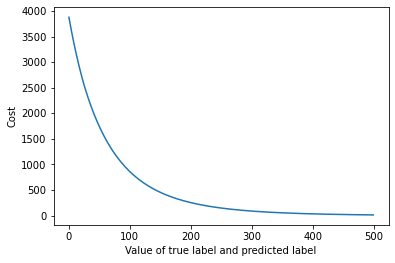

In [6]:
step_list = [i for i in range(len(loss_list))]
plt.plot(step_list, loss_list)
plt.ylabel('Cost')
plt.xlabel('Value of true label and predicted label')
plt.show()